# Applying Central Limit Theorem with Simulations

## 📚 Learning Objectives

By completing this notebook, you will:
- Apply Central Limit Theorem with simulations
- Understand how sample means converge to normal distribution
- Visualize CLT with different sample sizes and distributions
- Demonstrate CLT with real examples

## 🔗 Prerequisites

- ✅ Understanding of probability distributions
- ✅ Understanding of sampling and means
- ✅ Python, NumPy, Matplotlib knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 5**:
- Applying Central Limit Theorem with simulations
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 5 Practical Content

---

## Introduction

**Central Limit Theorem (CLT)** states that the distribution of sample means approaches a normal distribution as sample size increases, regardless of the original population distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("✅ Libraries imported!")
print("\nApplying Central Limit Theorem with Simulations")
print("=" * 60)

✅ Libraries imported!

Applying Central Limit Theorem with Simulations


## Part 1: CLT with Uniform Distribution


Part 1: CLT with Uniform Distribution

Original population: Uniform(0, 10)
Population mean: 4.9416
Population std: 2.8762

Sample size 2:
  Mean of sample means: 4.9646
  Std of sample means: 2.0388
  Theoretical std (σ/√n): 2.0338

Sample size 5:
  Mean of sample means: 4.9638
  Std of sample means: 1.2729
  Theoretical std (σ/√n): 1.2863

Sample size 10:
  Mean of sample means: 4.9464
  Std of sample means: 0.9066
  Theoretical std (σ/√n): 0.9095

Sample size 30:
  Mean of sample means: 4.9407
  Std of sample means: 0.5249
  Theoretical std (σ/√n): 0.5251



Sample size 100:
  Mean of sample means: 4.9403
  Std of sample means: 0.2884
  Theoretical std (σ/√n): 0.2876


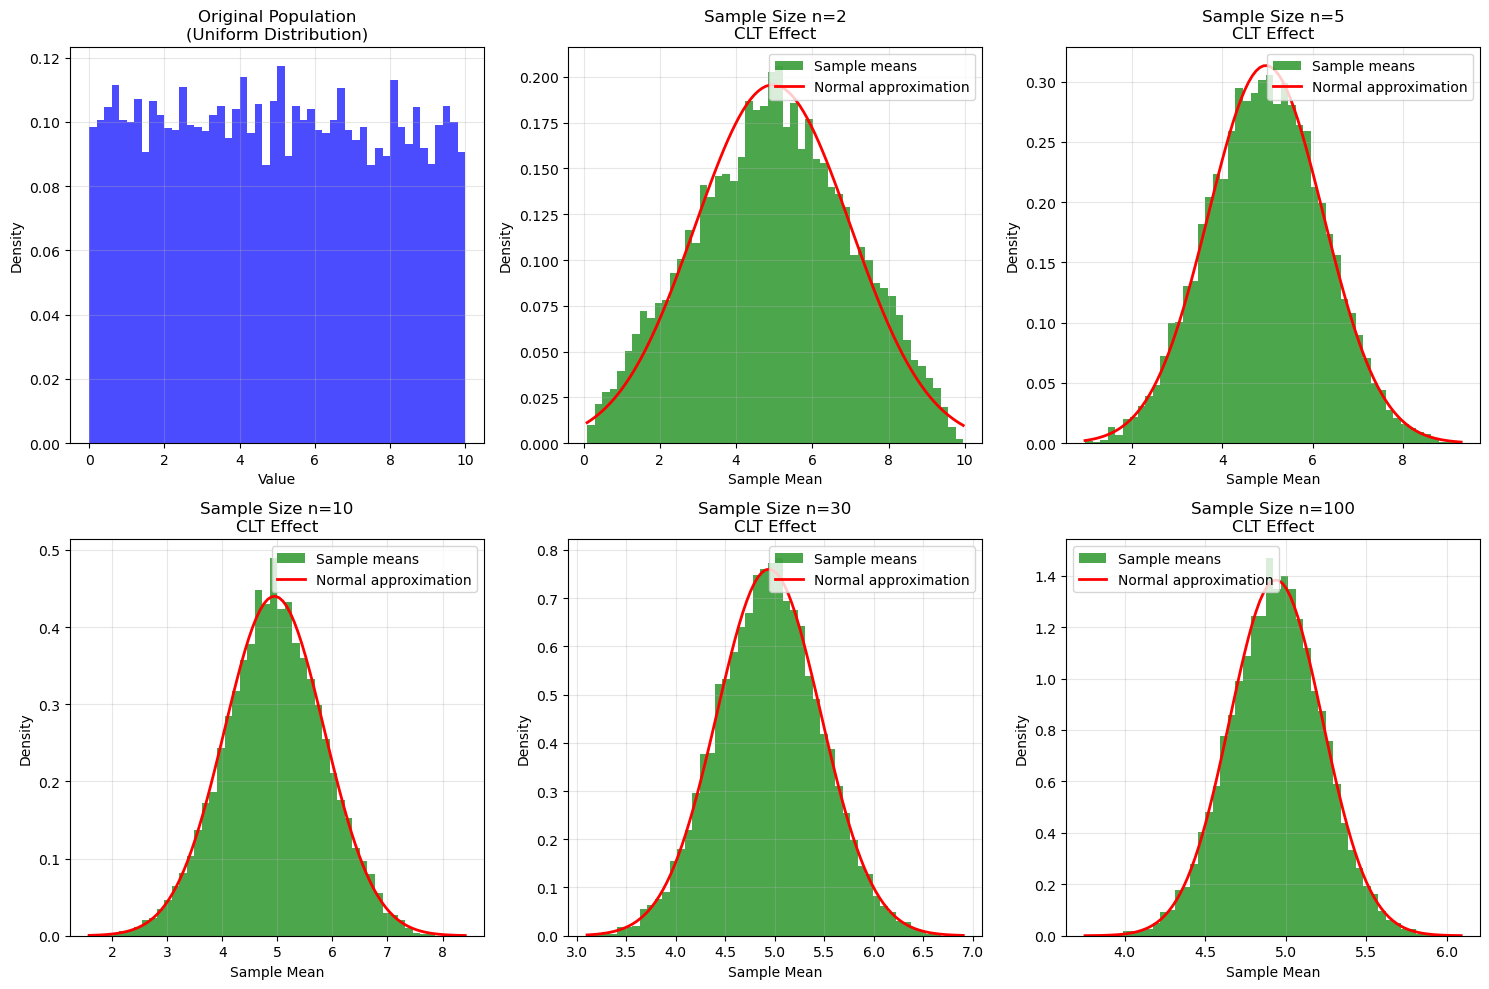


✅ CLT demonstrated with uniform distribution!


In [2]:
print("=" * 60)
print("Part 1: CLT with Uniform Distribution")
print("=" * 60)

# Original population: Uniform distribution
np.random.seed(42)
population = np.random.uniform(0, 10, 10000)

print(f"\nOriginal population: Uniform(0, 10)")
print(f"Population mean: {population.mean():.4f}")
print(f"Population std: {population.std():.4f}")

# Simulate CLT with different sample sizes
sample_sizes = [2, 5, 10, 30, 100]
n_simulations = 10000

sample_means = {}
for n in sample_sizes:
    means = []
    for _ in range(n_simulations):
        sample = np.random.choice(population, size=n, replace=True)
        means.append(sample.mean())
    sample_means[n] = np.array(means)
    print(f"\nSample size {n}:")
    print(f"  Mean of sample means: {sample_means[n].mean():.4f}")
    print(f"  Std of sample means: {sample_means[n].std():.4f}")
    print(f"  Theoretical std (σ/√n): {population.std()/np.sqrt(n):.4f}")

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original population
axes[0, 0].hist(population, bins=50, density=True, alpha=0.7, color='blue')
axes[0, 0].set_title('Original Population\n(Uniform Distribution)')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Density')
axes[0, 0].grid(True, alpha=0.3)

# Sample means for different sample sizes
for idx, n in enumerate(sample_sizes):
    row = (idx + 1) // 3
    col = (idx + 1) % 3
    ax = axes[row, col]
    
    ax.hist(sample_means[n], bins=50, density=True, alpha=0.7, color='green', label='Sample means')
    
    # Overlay normal distribution
    mean_means = sample_means[n].mean()
    std_means = sample_means[n].std()
    x = np.linspace(sample_means[n].min(), sample_means[n].max(), 100)
    y = stats.norm.pdf(x, mean_means, std_means)
    ax.plot(x, y, 'r-', linewidth=2, label='Normal approximation')
    
    ax.set_title(f'Sample Size n={n}\nCLT Effect')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ CLT demonstrated with uniform distribution!")

## Part 2: CLT with Different Distributions



Part 2: CLT with Different Distributions

Exponential Distribution:
  Population mean: 2.0340
  Mean of sample means: 2.0344
  Std of sample means: 0.3695

Poisson Distribution:
  Population mean: 3.0192
  Mean of sample means: 3.0168
  Std of sample means: 0.3157

Beta Distribution:
  Population mean: 0.2845
  Mean of sample means: 0.2851
  Std of sample means: 0.0281


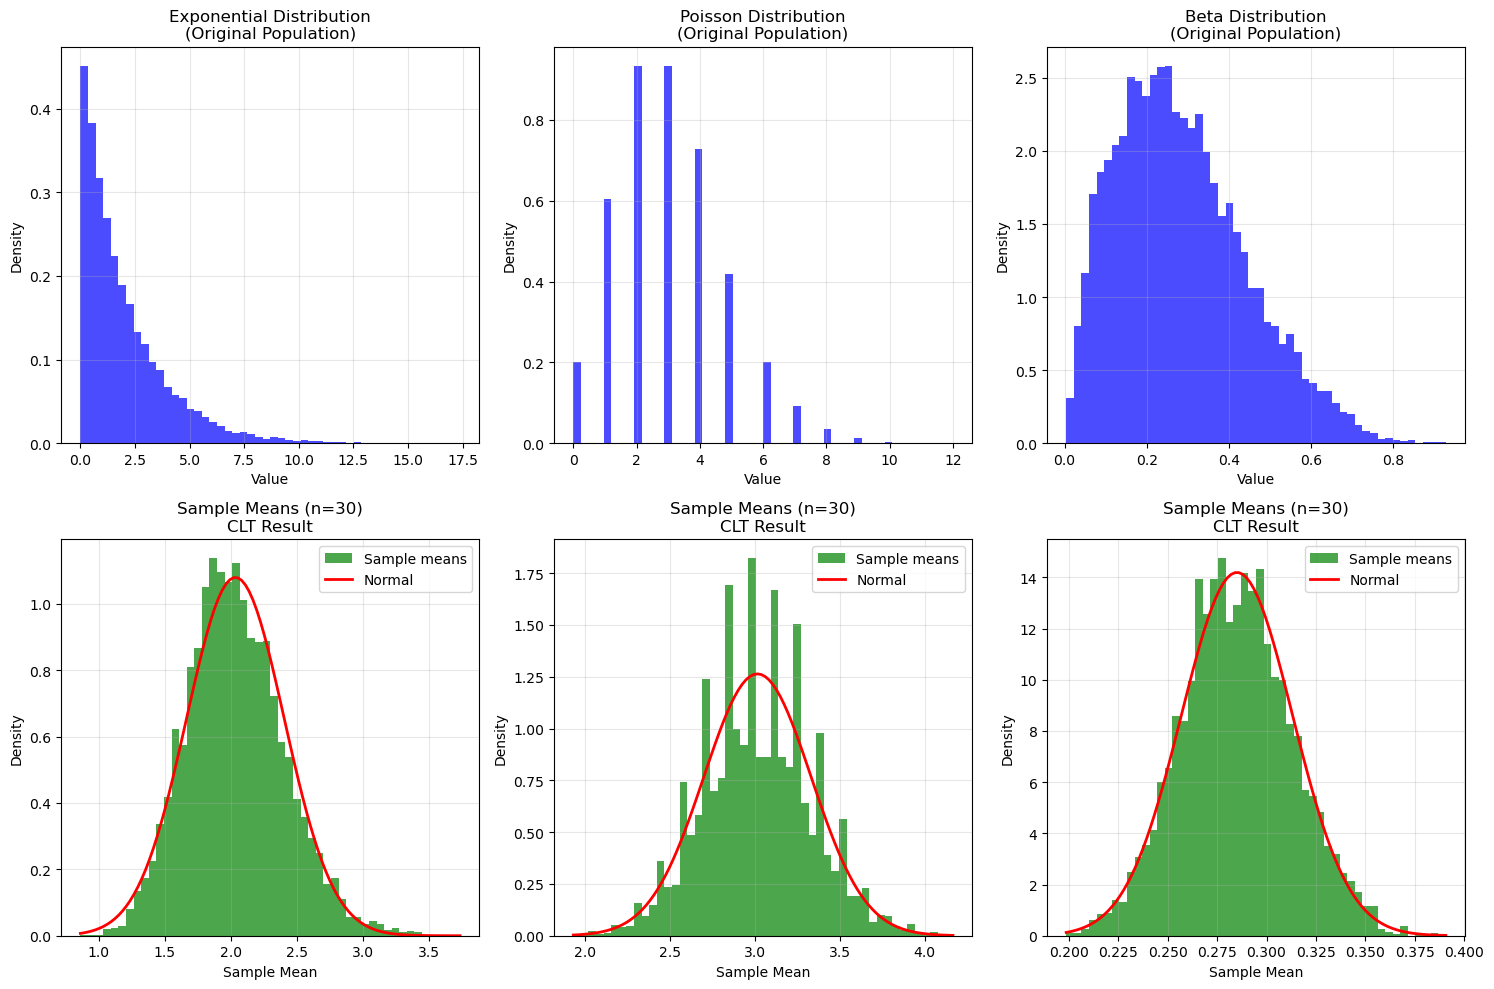


✅ CLT demonstrated with different distributions!


In [3]:
print("\n" + "=" * 60)
print("Part 2: CLT with Different Distributions")
print("=" * 60)

# Test CLT with different population distributions
distributions = {
    'Exponential': np.random.exponential(2, 10000),
    'Poisson': np.random.poisson(3, 10000),
    'Beta': np.random.beta(2, 5, 10000)
}

n_samples = 30
n_simulations = 5000

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, (name, population) in enumerate(distributions.items()):
    # Original distribution
    axes[0, idx].hist(population, bins=50, density=True, alpha=0.7, color='blue')
    axes[0, idx].set_title(f'{name} Distribution\n(Original Population)')
    axes[0, idx].set_xlabel('Value')
    axes[0, idx].set_ylabel('Density')
    axes[0, idx].grid(True, alpha=0.3)
    
    # Sample means
    means = []
    for _ in range(n_simulations):
        sample = np.random.choice(population, size=n_samples, replace=True)
        means.append(sample.mean())
    means = np.array(means)
    
    axes[1, idx].hist(means, bins=50, density=True, alpha=0.7, color='green', label='Sample means')
    
    # Normal approximation
    mean_means = means.mean()
    std_means = means.std()
    x = np.linspace(means.min(), means.max(), 100)
    y = stats.norm.pdf(x, mean_means, std_means)
    axes[1, idx].plot(x, y, 'r-', linewidth=2, label='Normal')
    
    axes[1, idx].set_title(f'Sample Means (n={n_samples})\nCLT Result')
    axes[1, idx].set_xlabel('Sample Mean')
    axes[1, idx].set_ylabel('Density')
    axes[1, idx].legend()
    axes[1, idx].grid(True, alpha=0.3)
    
    print(f"\n{name} Distribution:")
    print(f"  Population mean: {population.mean():.4f}")
    print(f"  Mean of sample means: {mean_means:.4f}")
    print(f"  Std of sample means: {std_means:.4f}")

plt.tight_layout()
plt.show()

print("\n✅ CLT demonstrated with different distributions!")

## Summary

### Key Concepts:
1. **Central Limit Theorem**: Sample means approach normal distribution as n increases
2. **Sample Size**: Larger samples lead to better normal approximation
3. **Distribution Independence**: CLT works regardless of original distribution
4. **Standard Error**: σ/√n decreases as sample size increases
5. **Practical Application**: Enables statistical inference on sample means

### Best Practices:
- Use sample size n ≥ 30 for good CLT approximation
- Verify assumptions before applying CLT
- Understand that CLT applies to means, not individual observations
- Use CLT for confidence intervals and hypothesis testing

### Applications:
- Statistical inference
- Confidence intervals
- Hypothesis testing
- Sampling theory

**Reference:** Course 03, Unit 5: "Probability and Statistical Inference" - Central Limit Theorem practical content